# Data Exploration

In [1]:
import json
import project_utilities_closed_form as utils
from project_utilities import pd, np

import seaborn as sns
import matplotlib.pyplot as plt

file_name_data = 'proj1_data.json'

with open(file_name_data) as fp:
    data = json.load(fp)

## Pre-processing Data

In [2]:
X = utils.add_marks_feature(data)  #add feature question mark and exclamation
X = utils.process_data(X)

# Creat and insert a new feature: children^power
If you don't want to add this feature, plese do not run

In [3]:
X = utils.add_new_children_feature(X,2.5)

## Split Data into Training, Validation, and Test Sets

In [4]:
X_train = X[0:10000]
X_validation = X[10000:11000]
X_test = X[11000:]

assert len(X_train) == 10000 , 'Expected 10000. Got %d' % len(X_train)
assert len(X_validation) == 1000 , 'Expected 1000. Got %d' % len(X_validation)
assert len(X_test) == 1000 , 'Expected 1000. Got %d' % len(X_test)

## Word Count Features

In [5]:
top_words_train = utils.get_top_words(X_train,60)
#top_words_validation = utils.get_top_words(X_validation,160)
#top_words_test = utils.get_top_words(X_test,160)

X_train = utils.insert_top_words_count(X_train, top_words_train)
X_validation = utils.insert_top_words_count(X_validation, top_words_train)
#X_test = utils.insert_top_words_count(X_test, top_words_test)

## Linear Regression

### Prepare Data by Converting to Pandas Dataframe

In [6]:
X_train = pd.DataFrame(X_train)
X_validation = pd.DataFrame(X_validation)

Index(['popularity_score', 'children', 'new_children_feature', 'top_word_014',
       'top_word_034', 'top_word_037', 'top_word_045', 'top_word_049',
       'top_word_020', 'top_word_008'],
      dtype='object')


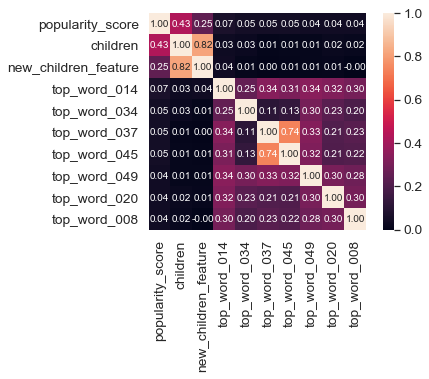

In [7]:
nb_top_corr = 10
cols = X_train.corr().nlargest(nb_top_corr, 'popularity_score')['popularity_score'].index
print(cols)
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

### Train Closed form Linear Regression Model

In [8]:
X_train['bias'] = pd.Series(np.ones(X_train.shape[0]), index=X_train.index)
y_train = X_train['popularity_score']
X_train.drop(columns=['text', 'popularity_score'], inplace=True)

### Make Predictions

In [9]:
X_validation['bias'] = pd.Series(np.ones(X_validation.shape[0]), index=X_validation.index)
y_validation = X_validation['popularity_score'].values
X_validation.drop(columns=['text', 'popularity_score'], inplace=True)

In [10]:
y_validation_preds = utils.closedformLinearRegression(X_train,y_train,X_validation)
y_train_preds = utils.closedformLinearRegression(X_train,y_train,X_train)

In [11]:
MSE_validation = utils.mse(y_validation, y_validation_preds)
#MSE_train = utils.mse(y_train, y_train_preds)
print('MES of validation set is: ',MSE_validation)
#print('MES of train set is: ',MSE_train)

MES of validation set is:  0.958297856578


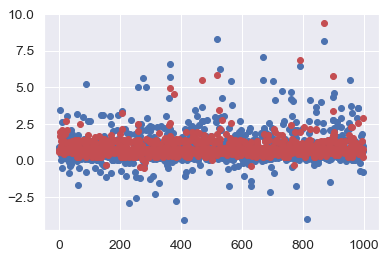

In [12]:
plt.plot(y_validation,"bo", y_validation_preds, 'ro')
plt.show()